In [3]:
import  tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPooling2D,UpSampling2D,Reshape,Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist,fashion_mnist


In [4]:
(X_train,y_train),(X_test,y_test)  = fashion_mnist.load_data()

In [5]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

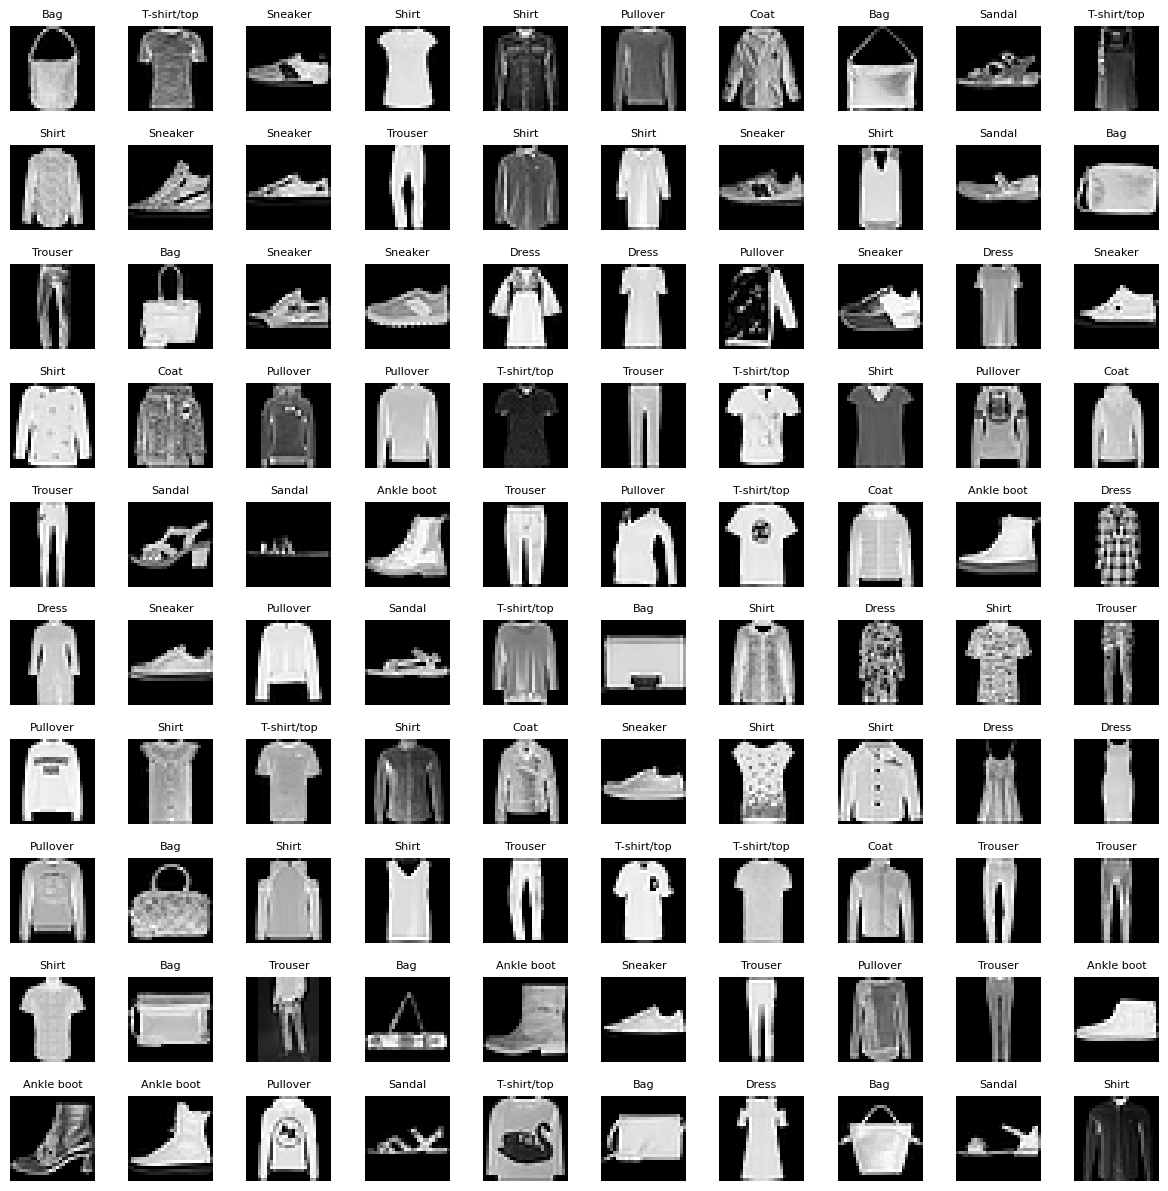

In [7]:
classes =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
width = 10
height = 10

fig,axes = plt.subplots(height,width,figsize=(15,15))
axes = axes.ravel()



for i in np.arange(0,width*height):
    index = np.random.randint(0,60000)
    axes[i].imshow(X_train[index],cmap='gray')
    axes[i].set_title(classes[y_train[index]],fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [8]:
X_train = X_train  / 255
X_test = X_test /255

In [9]:
X_train = X_train.reshape((len(X_train),28,28,1))
X_test = X_test.reshape((len(X_test),28,28,1))

In [10]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
autoencoder = Sequential()

# Encoder

autoencoder.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D((2,2)))

autoencoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder.add(MaxPooling2D((2,2),padding='same'))

autoencoder.add(Conv2D(8,(3,3),activation='relu',padding = 'same',strides=(2,2)))
autoencoder.add(Flatten())


# Decoder
autoencoder.add(Reshape((4,4,8)))
autoencoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(16,(3,3),activation='relu'))
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))


autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_12 (Flatten)        (None, 128)             

In [29]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
autoencoder.fit(X_train,X_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 29s 6ms/step - loss: 0.3104 - accuracy: 0.5037
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2879 - accuracy: 0.5062
Epoch 3/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2835 - accuracy: 0.5069
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2810 - accuracy: 0.5073
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2793 - accuracy: 0.5075
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2780 - accuracy: 0.5077
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2771 - accuracy: 0.5078
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2764 - accuracy: 0.5079
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2758 - accuracy: 0.5080
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - l

In [31]:
autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_12 (Flatten)        (None, 128)             

In [32]:
encoder = Model(inputs = autoencoder.input,outputs = autoencoder.get_layer('flatten_12').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_55 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                             

In [33]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
coded_test_images.shape

(10000, 128)

In [35]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 [==============================] - 1s 4ms/step


(10000, 28, 28, 1)

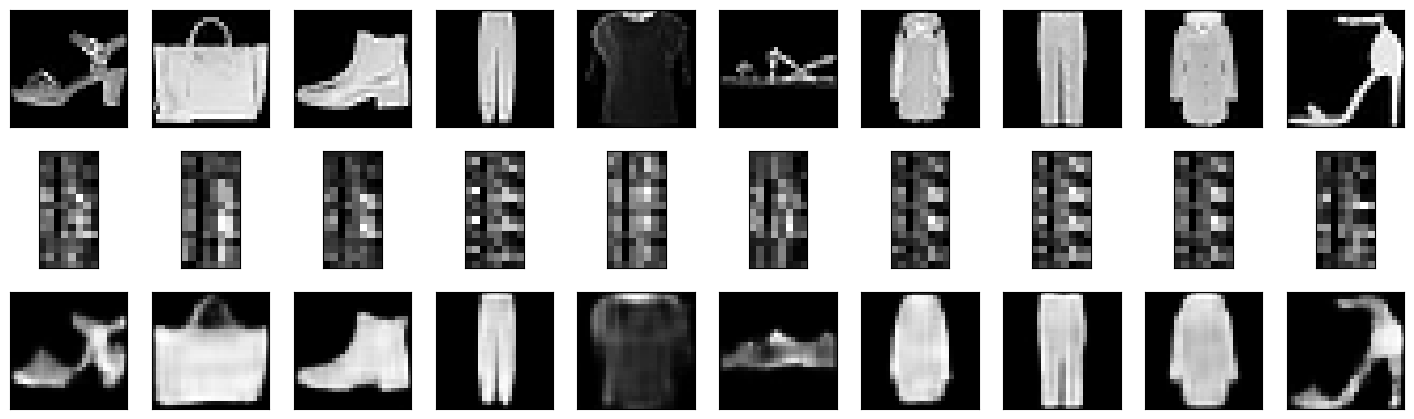

In [40]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0],size=n_images)
plt.figure(figsize=(18,18))

for i,image_index in enumerate(test_images):
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index].reshape(28,28),cmap='gray')
    plt.xticks(())
    plt.yticks(())

    ax = plt.subplot(10,10,i+1+n_images)
    plt.imshow(coded_test_images[image_index].reshape(16,8),cmap='gray')
    plt.xticks(())
    plt.yticks(())

    ax = plt.subplot(10,10,i+1+n_images+10)
    plt.imshow(decoded_test_images[image_index],cmap='gray')
    plt.xticks(())
    plt.yticks(())

